In [6]:
import cv2
import numpy as np
from  matplotlib import pyplot as plt
from pathlib import Path

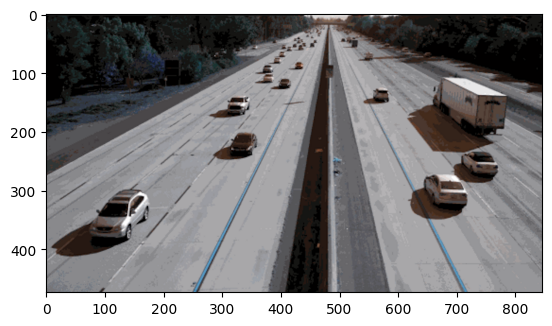

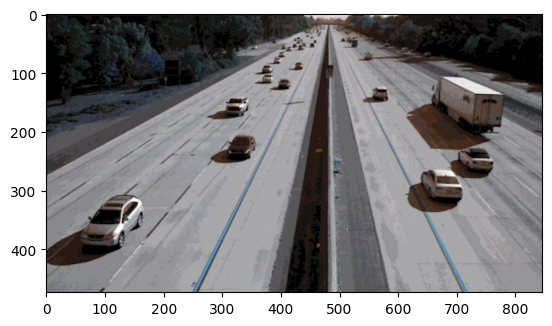

In [7]:
autoroute1 = cv2.imread("images/autoroute1.png")
autoroute1 = cv2.cvtColor(autoroute1, cv2.COLOR_BGR2RGB)
autoroute2 = cv2.imread("images/autoroute2.png")
autoroute2 = cv2.cvtColor(autoroute2, cv2.COLOR_BGR2RGB)

rub1 = cv2.imread("images/rub1.png")
rub1 = cv2.cvtColor(rub1, cv2.COLOR_BGR2RGB)
rub2 = cv2.imread("images/rub2.png")
rub2 = cv2.cvtColor(rub2, cv2.COLOR_BGR2RGB)


plt.figure()
plt.imshow(autoroute1)
plt.show
plt.figure()
plt.imshow(autoroute2)
plt.show()

In [8]:
autoroute2.shape

(474, 846, 3)

## - Implementation l'estimation du flot optique par la méthode de Lucas-Kanade : l'estimation se fera uniquement en certains points de l'image, obtenus grâce à la fonction cv.goodFeaturesToTrack

In [9]:

def estimate_motion(img1, img2, point, resoltion_function=lambda A, b: np.linalg.inv(A.T@A)@A.T@b):
   

    p = point
    neighboor_coords = [(p[0] + i, p[1] + j) for i in [-1, 0, 1] for j in [-1, 0, 1] if i*j + i+j != 0]
    neighboor_coords = [neighboor_coord for neighboor_coord in neighboor_coords if 0 <= neighboor_coord[0] < img1.shape[0] and 0 <= neighboor_coord[1] < img1.shape[1]]
    sobelx = cv2.Sobel(img1,cv2.CV_64F,1,0,ksize=5)
    sobely = cv2.Sobel(img1,cv2.CV_64F,0,1,ksize=5)
    #print("shape sobel", sobelx.shape)

    It = img2-img1
    
    Ix = np.array([sobelx[neighboor_coord] for neighboor_coord in neighboor_coords])
    Iy = np.array([ sobely[neighboor_coord] for neighboor_coord in neighboor_coords])
    It = -1*np.array([(img1-img2)[neighboor_coord] for neighboor_coord in neighboor_coords])

    I = np.array([Ix, Iy]).T

    #v = np.linalg.lstsq(I, -1*It, rcond=None)[0]
    v = resoltion_function(I, It)
    # print("shape Ix", Ix.shape)
    # print("shape It", It.shape)
    # print("shape I", I.shape)
    # print("v shape", v.shape)
    # selected_p_1 = np.array([img1[p[0], p[1]]  for p in point])
    # selected_p_2 = np.array([img2[p[0], p[1]]  for p in point])
    return v

In [10]:
print(estimate_motion(img1, img2, features[23], lambda A, b: np.linalg.inv(A.T@A)@A.T@b))
print(estimate_motion(img1, img2, features[23], lambda A, b: np.linalg.lstsq(A, b, rcond=None)[0]))

[ 0.0513739  -0.07825989]
[ 0.0513739  -0.07825989]


In [11]:

resolver = lambda A, b: np.linalg.lstsq(A, b, rcond=None)[0]

img1 = cv2.cvtColor(autoroute1, cv2.COLOR_RGB2GRAY)
img2 = cv2.cvtColor(autoroute2, cv2.COLOR_RGB2GRAY)

features = cv2.goodFeaturesToTrack(img1, maxCorners=100, qualityLevel=0.3, minDistance=7)
features =  features.reshape((features.shape[0], features.shape[2]))
features =  np.array([features[:,1], features[:,0]]).T
features = features.astype(int)
vector = np.array([ estimate_motion(img1, img2, tuple(feature),resolver ) for feature in features])


vector.shape

(52, 2)

In [12]:
motion = [(feature[0], feature[1], estimate_motion(img1, img2, tuple(feature), resolver)) for feature in features]


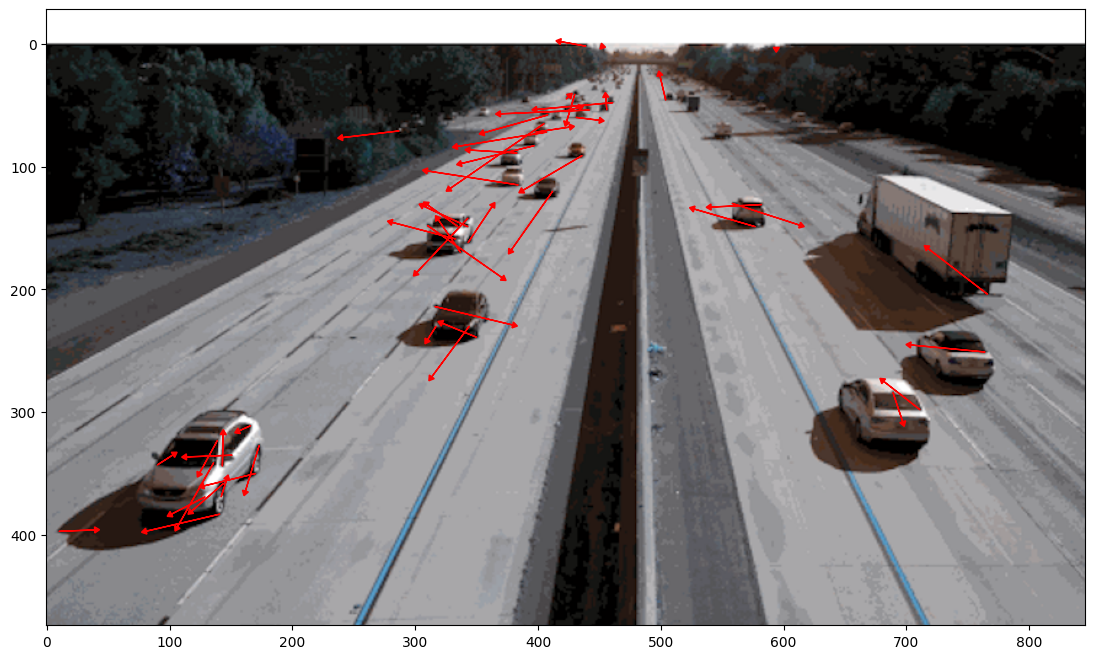

In [13]:
plt.figure(figsize=(18, 8))
plt.imshow(autoroute1)
alpha = 1000
for v in motion:
    plt.arrow(v[1],v[0],alpha*v[2][0],alpha*v[2][1], head_width = 5, head_length = 4, color = "r")

plt.show()

In [14]:
# motion_array = np.zeros((*img1.shape, 2))
# motion_array.shape
# for idx in range(features.shape[0]):
# )
#     motion_array[tuple(features[idx])] = vector[idx]



# u = motion_array[:, :, 0]
# v = motion_array[:, :, 1]
# t = 1
# plt.imshow(autoroute1)
# S = np.shape(img1)
# for i in range(S[0]):
#     for j in range(S[1]):
#         if abs(u[i,j])>0.5 or abs(v[i,j])>.5:
#             plt.arrow(j,i,alpha*v[i,j],alpha*u[i,j], head_width = 2, head_length = 5, color = "r")

# plt.show()

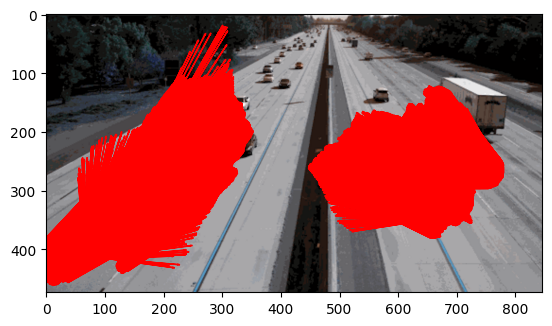

In [15]:
flow = cv2.calcOpticalFlowFarneback(img1, img2, None, 0.5, 3, 15, 3, 5, 1.2, 0)


u = flow[:, :, 0]
v = flow[:, :, 1]
t = 7
plt.imshow(autoroute1)
S = np.shape(img1)
for i in range(S[0]):
    for j in range(S[1]):
        if abs(u[i,j])>t or abs(v[i,j])>t:
            plt.arrow(j,i,15*v[i,j],15*u[i,j], head_width = 2, head_length = 4, color = "r")

plt.show()

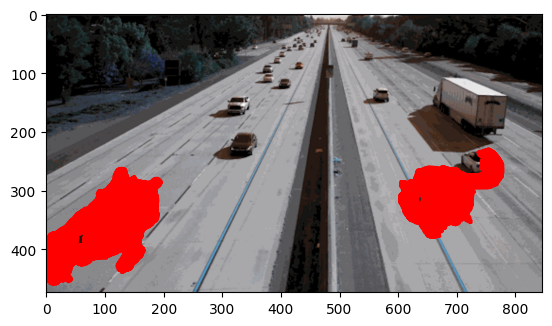

In [16]:
features = cv2.goodFeaturesToTrack(img1, maxCorners=100, qualityLevel=0.3, minDistance=7)
flow = cv2.calcOpticalFlowFarneback(img1, img2, None, 0.5, 3, 15, 3, 5, 1.2, 0)


u = flow[:, :, 0]
v = flow[:, :, 1]
t = 7
plt.imshow(autoroute1)
S = np.shape(img1)
for i in range(S[0]):
    for j in range(S[1]):
        if abs(u[i,j])>t or abs(v[i,j])>t:
            plt.arrow(j,i,.5*v[i,j],.5*u[i,j], head_width = 2, head_length = 4, color = "r")

plt.show()

# implementation de Lucas Canade avec on convolution au lieu de sobel

In [17]:
from scipy import signal

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


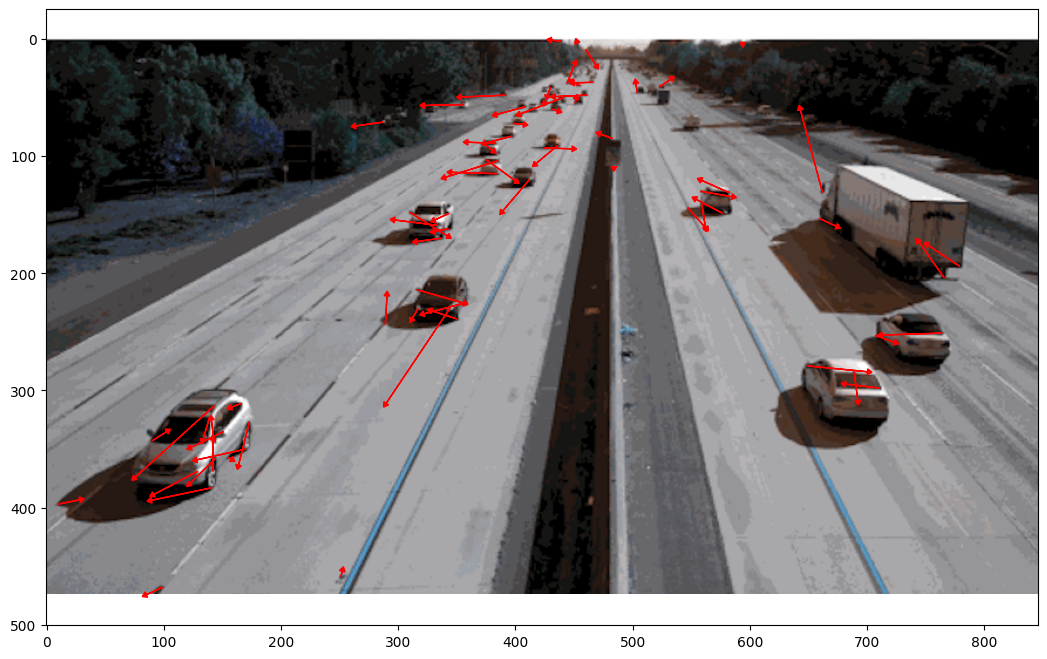

In [18]:



def estimate_motion(img1, img2, point, resoltion_function=lambda A, b: np.linalg.inv(A.T@A)@A.T@b):
   

    p = point
    neighboor_coords = [(p[0] + i, p[1] + j) for i in [-1, 0, 1] for j in [-1, 0, 1] if i*j + i+j != 0]
    neighboor_coords = [neighboor_coord for neighboor_coord in neighboor_coords if 0 <= neighboor_coord[0] < img1.shape[0] and 0 <= neighboor_coord[1] < img1.shape[1]]
    kernelx = [[-1, 0, 1],[-1, 0, 1],[-1, 0, 1]]
    kernely = [[-1, -1, -1], [0, 0, 0], [1, 1, 1]]
    gradiantx = signal.convolve2d(img1, kernelx, mode='same') + signal.convolve2d(img2, kernelx, mode='same')
    gradianty = signal.convolve2d(img1, kernely, mode='same') + signal.convolve2d(img2, kernely, mode='same')


    It = img2-img1
    
    Ix = np.array([gradiantx[neighboor_coord] for neighboor_coord in neighboor_coords])
    Iy = np.array([ gradianty[neighboor_coord] for neighboor_coord in neighboor_coords])
    It = np.array([(img1-img2)[neighboor_coord] for neighboor_coord in neighboor_coords])

    I = np.array([Ix, Iy]).T

    #v = np.linalg.lstsq(I, -1*It, rcond=None)[0]
    v = resoltion_function(I, It)
    # print("shape Ix", Ix.shape)
    # print("shape It", It.shape)
    # print("shape I", I.shape)
    # print("v shape", v.shape)
    # selected_p_1 = np.array([img1[p[0], p[1]]  for p in point])
    # selected_p_2 = np.array([img2[p[0], p[1]]  for p in point])
    return v


resolver = lambda A, b: np.linalg.lstsq(A, b, rcond=None)[0]

img1 = cv2.cvtColor(autoroute1, cv2.COLOR_RGB2GRAY)
img2 = cv2.cvtColor(autoroute2, cv2.COLOR_RGB2GRAY)

features = cv2.goodFeaturesToTrack(img1, maxCorners=100, qualityLevel=0.2, minDistance=10)
# features = cv2.goodFeaturesToTrack(img1, 1000, .01, 5)
features =  features.reshape((features.shape[0], features.shape[2]))
features =  np.array([features[:,1], features[:,0]]).T
features = features.astype(int)

motion = [(feature[0], feature[1], estimate_motion(img1, img2, tuple(feature), resolver)) for feature in features]


plt.figure(figsize=(18, 8))
plt.imshow(autoroute1)
alpha = 50
for v in motion:
    plt.arrow(v[1],v[0],alpha*v[2][0],alpha*v[2][1], head_width = 5, head_length = 4, color = "r")

plt.show()

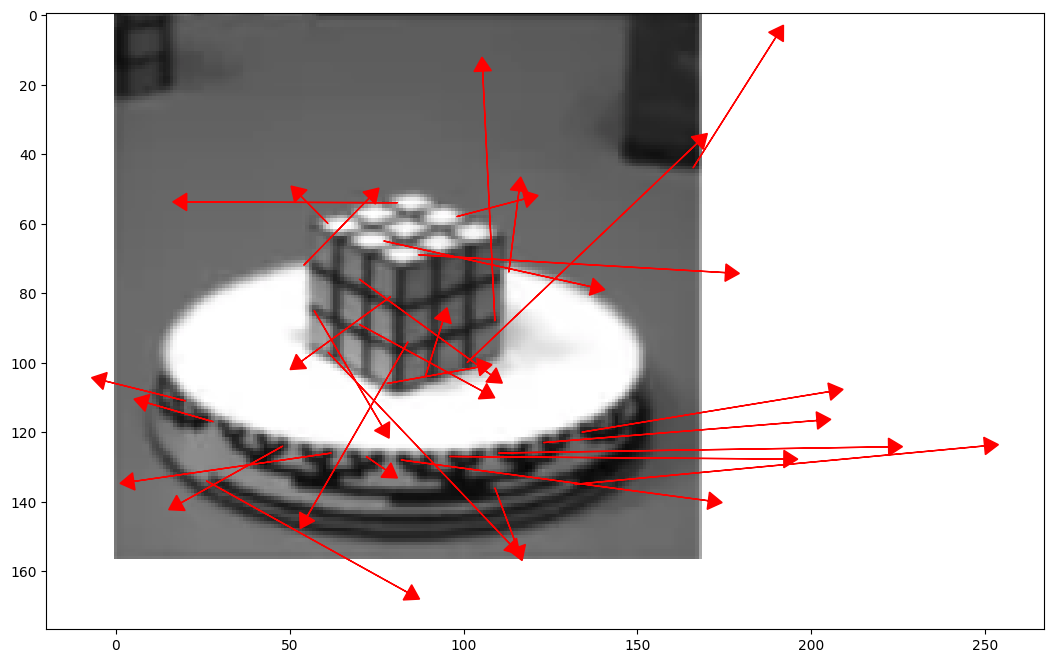

In [21]:



def estimate_motion(img1, img2, point, resoltion_function=lambda A, b: np.linalg.inv(A.T@A)@A.T@b):
   

    p = point
    neighboor_coords = [(p[0] + i, p[1] + j) for i in [-1, 0, 1] for j in [-1, 0, 1] if i*j + i+j != 0]
    neighboor_coords = [neighboor_coord for neighboor_coord in neighboor_coords if 0 <= neighboor_coord[0] < img1.shape[0] and 0 <= neighboor_coord[1] < img1.shape[1]]
    kernelx = [[-1, 0, 1],[-1, 0, 1],[-1, 0, 1]]
    kernely = [[-1, -1, -1], [0, 0, 0], [1, 1, 1]]
    gradiantx = signal.convolve2d(img1, kernelx, mode='same') + signal.convolve2d(img2, kernelx, mode='same')
    gradianty = signal.convolve2d(img1, kernely, mode='same') + signal.convolve2d(img2, kernely, mode='same')


    It = img2-img1
    
    Ix = np.array([gradiantx[neighboor_coord] for neighboor_coord in neighboor_coords])
    Iy = np.array([ gradianty[neighboor_coord] for neighboor_coord in neighboor_coords])
    It = np.array([(img1-img2)[neighboor_coord] for neighboor_coord in neighboor_coords])

    I = np.array([Ix, Iy]).T

    #v = np.linalg.lstsq(I, -1*It, rcond=None)[0]
    v = resoltion_function(I, It)
    # print("shape Ix", Ix.shape)
    # print("shape It", It.shape)
    # print("shape I", I.shape)
    # print("v shape", v.shape)
    # selected_p_1 = np.array([img1[p[0], p[1]]  for p in point])
    # selected_p_2 = np.array([img2[p[0], p[1]]  for p in point])
    return v


resolver = lambda A, b: np.linalg.lstsq(A, b, rcond=None)[0]

img1 = cv2.cvtColor(rub1, cv2.COLOR_RGB2GRAY)
img2 = cv2.cvtColor(rub2, cv2.COLOR_RGB2GRAY)

features = cv2.goodFeaturesToTrack(img1, maxCorners=100, qualityLevel=0.2, minDistance=10)
# features = cv2.goodFeaturesToTrack(img1, 1000, .01, 5)
features =  features.reshape((features.shape[0], features.shape[2]))
features =  np.array([features[:,1], features[:,0]]).T
features = features.astype(int)

motion = [(feature[0], feature[1], estimate_motion(img1, img2, tuple(feature), resolver)) for feature in features]


plt.figure(figsize=(18, 8))
plt.imshow(rub1)
alpha = 50
for v in motion:
    plt.arrow(v[1],v[0],alpha*v[2][0],alpha*v[2][1], head_width = 5, head_length = 4, color = "r")

plt.show()

## applying Lucas canade sur un region autour du point


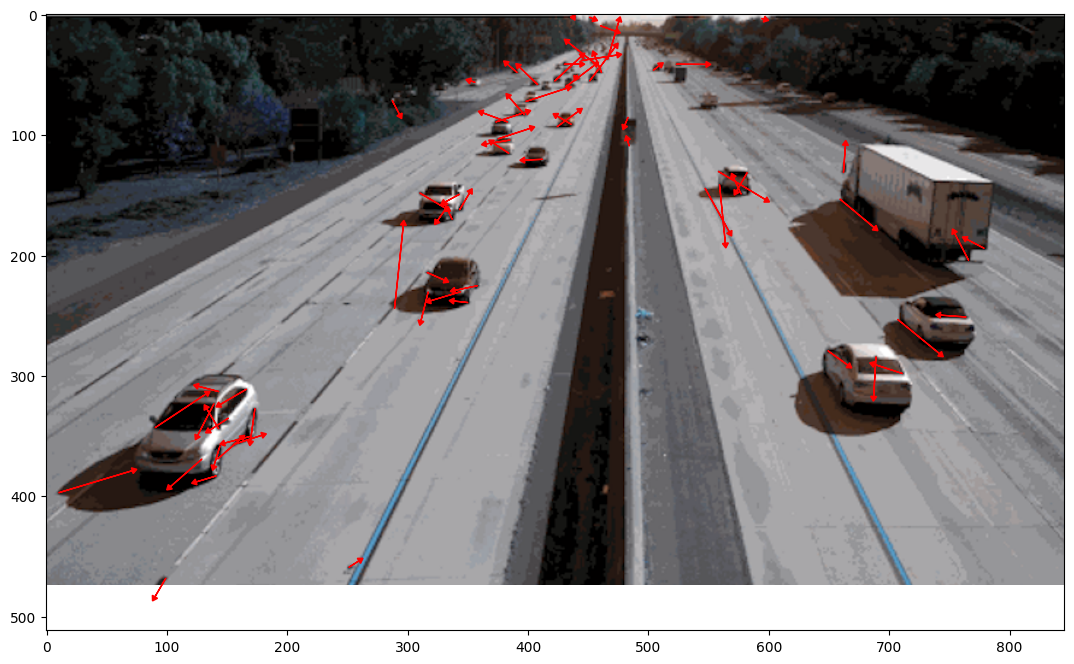

In [19]:

def estimate_motion_window(img1, img2, point, ws = 2, resolution_function=lambda A, b: np.linalg.inv(A.T@A)@A.T@b):
    p = point
    # neighboor_coords = [(p[0] + i, p[1] + j) for i in [-1, 0, 1] for j in [-1, 0, 1] if i*j + i+j != 0]
    # neighboor_coords = [neighboor_coord for neighboor_coord in neighboor_coords if 0 <= neighboor_coord[0] < img1.shape[0] and 0 <= neighboor_coord[1] < img1.shape[1]]
    kernelx = [[-1, 0, 1],[-1, 0, 1],[-1, 0, 1]]
    kernely = [[-1, -1, -1], [0, 0, 0], [1, 1, 1]]
    gradiantx = signal.convolve2d(img1, kernelx, mode='same') + signal.convolve2d(img2, kernelx, mode='same')
    gradianty = signal.convolve2d(img1, kernely, mode='same') + signal.convolve2d(img2, kernely, mode='same')


    It = img2-img1
    Ix = gradiantx[p[0] -ws:p[0]+ws+1, p[1] -ws:p[1]+ws+1].flatten()
    Iy = gradianty[p[0] -ws:p[0]+ws+1, p[1] -ws:p[1]+ws+1].flatten()
    It = It[p[0] -ws:p[0]+ws+1, p[1] -ws:p[1]+ws+1].flatten()

    I = np.array([Ix, Iy]).T

    #v = np.linalg.lstsq(I, -1*It, rcond=None)[0]
    v = resolution_function(I, It)
    
    # print("shape I", I.shape)
    # print("v shape", v.shape)
    # selected_p_1 = np.array([img1[p[0], p[1]]  for p in point])
    # selected_p_2 = np.array([img2[p[0], p[1]]  for p in point])
    return v

resolver = lambda A, b: np.linalg.lstsq(A, b, rcond=None)[0]

img1 = cv2.cvtColor(autoroute1, cv2.COLOR_RGB2GRAY)
img2 = cv2.cvtColor(autoroute2, cv2.COLOR_RGB2GRAY)

features = cv2.goodFeaturesToTrack(img1, maxCorners=100, qualityLevel=0.2, minDistance=10)
# features = cv2.goodFeaturesToTrack(img1, 1000, .01, 5)
features =  features.reshape((features.shape[0], features.shape[2]))
features =  np.array([features[:,1], features[:,0]]).T
features = features.astype(int)

motion = [(feature[0], feature[1], estimate_motion_window(img1, img2, tuple(feature),ws=2, resolution_function=resolver)) for feature in features]


plt.figure(figsize=(18, 8))
plt.imshow(autoroute1)
alpha = 50
for v in motion:
    plt.arrow(v[1],v[0],alpha*v[2][0],alpha*v[2][1], head_width = 5, head_length = 4, color = "r")

plt.show()

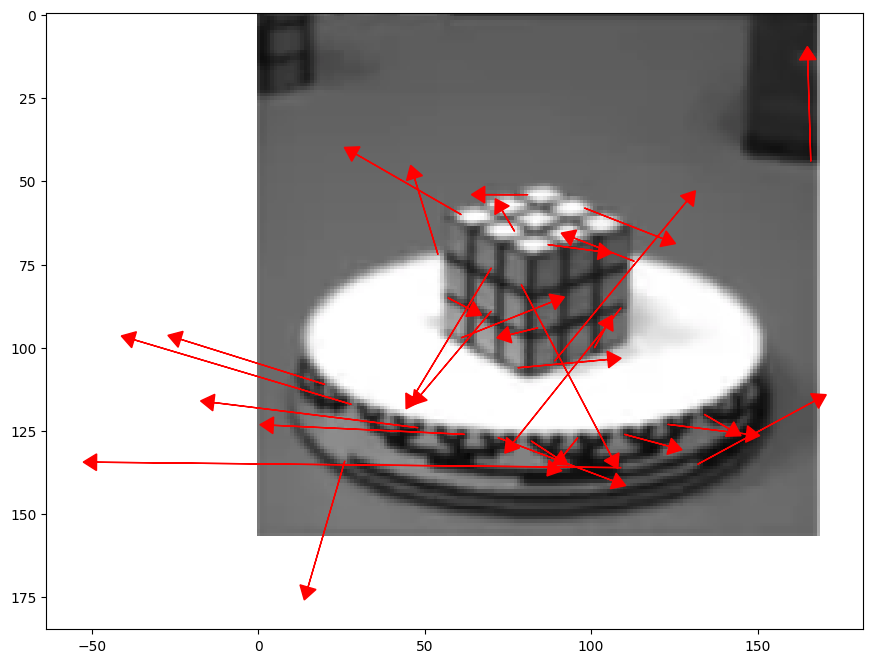

In [20]:

def estimate_motion_window(img1, img2, point, ws = 2, resolution_function=lambda A, b: np.linalg.inv(A.T@A)@A.T@b):
    p = point
    # neighboor_coords = [(p[0] + i, p[1] + j) for i in [-1, 0, 1] for j in [-1, 0, 1] if i*j + i+j != 0]
    # neighboor_coords = [neighboor_coord for neighboor_coord in neighboor_coords if 0 <= neighboor_coord[0] < img1.shape[0] and 0 <= neighboor_coord[1] < img1.shape[1]]
    kernelx = [[-1, 0, 1],[-1, 0, 1],[-1, 0, 1]]
    kernely = [[-1, -1, -1], [0, 0, 0], [1, 1, 1]]
    gradiantx = signal.convolve2d(img1, kernelx, mode='same') + signal.convolve2d(img2, kernelx, mode='same')
    gradianty = signal.convolve2d(img1, kernely, mode='same') + signal.convolve2d(img2, kernely, mode='same')


    It = img2-img1
    Ix = gradiantx[p[0] -ws:p[0]+ws+1, p[1] -ws:p[1]+ws+1].flatten()
    Iy = gradianty[p[0] -ws:p[0]+ws+1, p[1] -ws:p[1]+ws+1].flatten()
    It = It[p[0] -ws:p[0]+ws+1, p[1] -ws:p[1]+ws+1].flatten()

    I = np.array([Ix, Iy]).T

    #v = np.linalg.lstsq(I, -1*It, rcond=None)[0]
    v = resolution_function(I, It)
    
    # print("shape I", I.shape)
    # print("v shape", v.shape)
    # selected_p_1 = np.array([img1[p[0], p[1]]  for p in point])
    # selected_p_2 = np.array([img2[p[0], p[1]]  for p in point])
    return v

resolver = lambda A, b: np.linalg.lstsq(A, b, rcond=None)[0]

img1 = cv2.cvtColor(rub1, cv2.COLOR_RGB2GRAY)
img2 = cv2.cvtColor(rub2, cv2.COLOR_RGB2GRAY)

features = cv2.goodFeaturesToTrack(img1, maxCorners=100, qualityLevel=0.2, minDistance=10)
# features = cv2.goodFeaturesToTrack(img1, 1000, .01, 5)
features =  features.reshape((features.shape[0], features.shape[2]))
features =  np.array([features[:,1], features[:,0]]).T
features = features.astype(int)

motion = [(feature[0], feature[1], estimate_motion_window(img1, img2, tuple(feature),ws=2, resolution_function=resolver)) for feature in features]


plt.figure(figsize=(18, 8))
plt.imshow(rub1)
alpha = 50
for v in motion:
    plt.arrow(v[1],v[0],alpha*v[2][0],alpha*v[2][1], head_width = 5, head_length = 4, color = "r")

plt.show()